In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # when expected value has to be computed

from scipy.stats import chi2 # distibution


## Coin toss

In [43]:
# H0: Coin is fair
# Ha: Coin is biased

alpha = 0.05

chi_stat, p_value = chisquare(
    [28, 22], # observed heads and tails
    [25, 25], # expected heads and tails, under H0
)
print(chi_stat)
print(p_value)
if p_value < alpha:
    print("Reject H0")
    print("Coin is biased")
else:
    print("Fail to reject H0")
    print("Coin is fair")

0.72
0.3961439091520741
Fail to reject H0
Coin is fair


In [9]:
# H0: Coin is fair
# Ha: Coin is biased

alpha = 0.01

chi_stat, p_value = chisquare(
     [13000,9000,15000,3000,14000,6000], # observed heads and tails
    [10000,10000,10000,10000,10000,10000]# expected heads and tails, under H0
   
)
print(chi_stat)
print(p_value)
if p_value < alpha:
    print("Reject H0")
    print("Dice is biased")
else:
    print("Fail to reject H0")
    print("Dice is fair")

11600.0
0.0
Reject H0
Dice is biased


In [4]:
60000/6

10000.0

In [44]:
(28-25)**2/25 + (22-25)**2/25

0.72

In [45]:
1 - chi2.cdf(0.72, df=1)

0.3961439091520741

In [46]:
# H0: Coin is fair
# Ha: Coin is biased

alpha = 0.05

chi_stat, p_value = chisquare(
    [45, 5], # observed heads and tails
    [25, 25], # expected heads and tails, under H0
)
print(chi_stat)
print(p_value)
if p_value < alpha:
    print("Reject H0")
    print("Coin is biabsed")
else:
    print("Fail to reject H0")
    print("Coin is fair")

32.0
1.5417257900280013e-08
Reject H0
Coin is biabsed


In [47]:
chi_stat = (45 - 25)**2/25 + (5-25)**2/25
print(chi_stat)

32.0


In [48]:
1 - chi2.cdf(32, df=1)

1.5417257914762672e-08

In [49]:
# Critical X2 stat for 5% significance
chi2.ppf(0.95, df=1)

3.841458820694124

Any value of X2 stat greater than 3.84, we reject H0

## Gender vs Preference (online/offline)

In [50]:
# H0: Gender and preference are independent
# Ha: Gender and preference are dependedent

observed = [
    [527, 72],
    [206, 102],
]

chi_stat, p_value, df, exp_values = chi2_contingency(observed) # chi_stat, p_value, df, exp_values

In [51]:
chi_stat

57.04098674049609

In [52]:
p_value

4.268230756875865e-14

In [53]:
df

1

In [54]:
exp_values

array([[484.08710033, 114.91289967],
       [248.91289967,  59.08710033]])

In [55]:
if p_value < alpha:
    print("Reject H0")
    print("Gender and preference are dependedent")
else:
    print("Fail to reject H0")
    print("Gender and preference are independent")

Reject H0
Gender and preference are dependedent


## Aerofit

In [56]:
df_aerofit = pd.read_csv("aerofit.csv")

In [57]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [58]:
gender_product = pd.crosstab(index=df_aerofit['Gender'],columns=df_aerofit['Product'])
gender_product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [67]:
# H0: Gender and product are independent
# Ha: Gender and product are dependent

chi_stat, p_value, df, exp_value = chi2_contingency(gender_product)
print("exp_value: " + str(exp_value )+"\n")
print("p_value: " + str(p_value ))
print("df: " + str(df ))
print("chi_stat: " + str(chi_stat ))

exp_value: [[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]

p_value: 0.0015617972833158714
df: 2
chi_stat: 12.923836032388664


In [24]:
if p_value < 0.05:
    print("Reject H0")
    print("Gender impacts product")

Reject H0
Gender impacts product


## Assignment Question 1

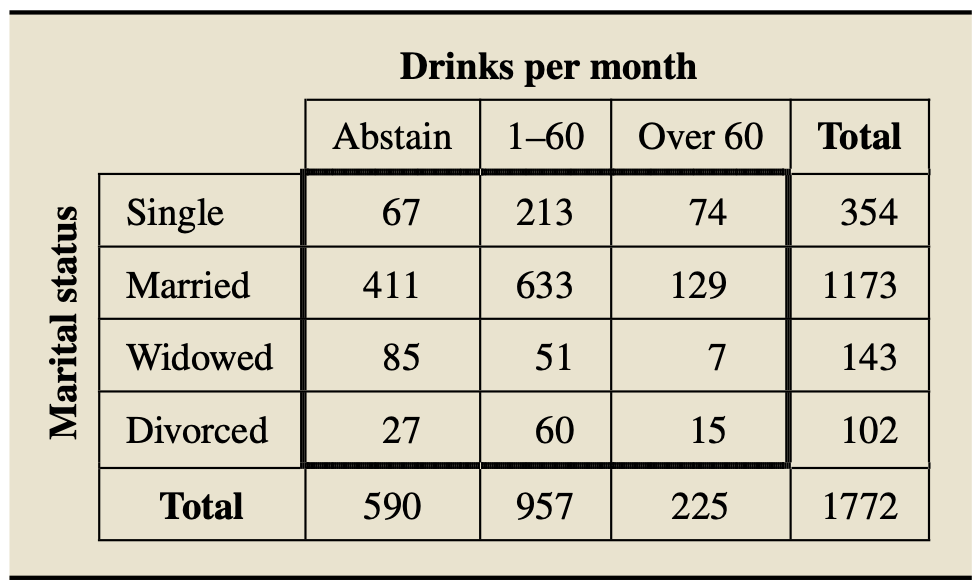

* H0 -> Marriage and alcohol consumttion are indepenent
* Ha -> Marriage and alcohol consumption are dependednt

In [28]:
alpha = 0.05
chi_stat, p_value,df,expected = chi2_contingency(np.array([
    [67,213,74],
    [411,633,129],
    [85,51,7],
    [27,60,15]
]))
p_value


3.925170647869838e-18

In [26]:

if p_value < alpha:
    print("Reject null hyoitesis")
    print("Marriage and alcohol consumption are dependednt")
else:
    print("Failed to reject null hyoitesis")
    print("Marriage and alcohol consumption are independednt")
p_value

Reject null hyoitesis
Marriage and alcohol consumption are dependednt


3.925170647869838e-18

## Assignment Question 2

Preventable chronic diseases are increasing rapidly in Native American populations, particularly diabetes.
Below is a contingency table showing cross-classification of educational attainment and diabetic state.

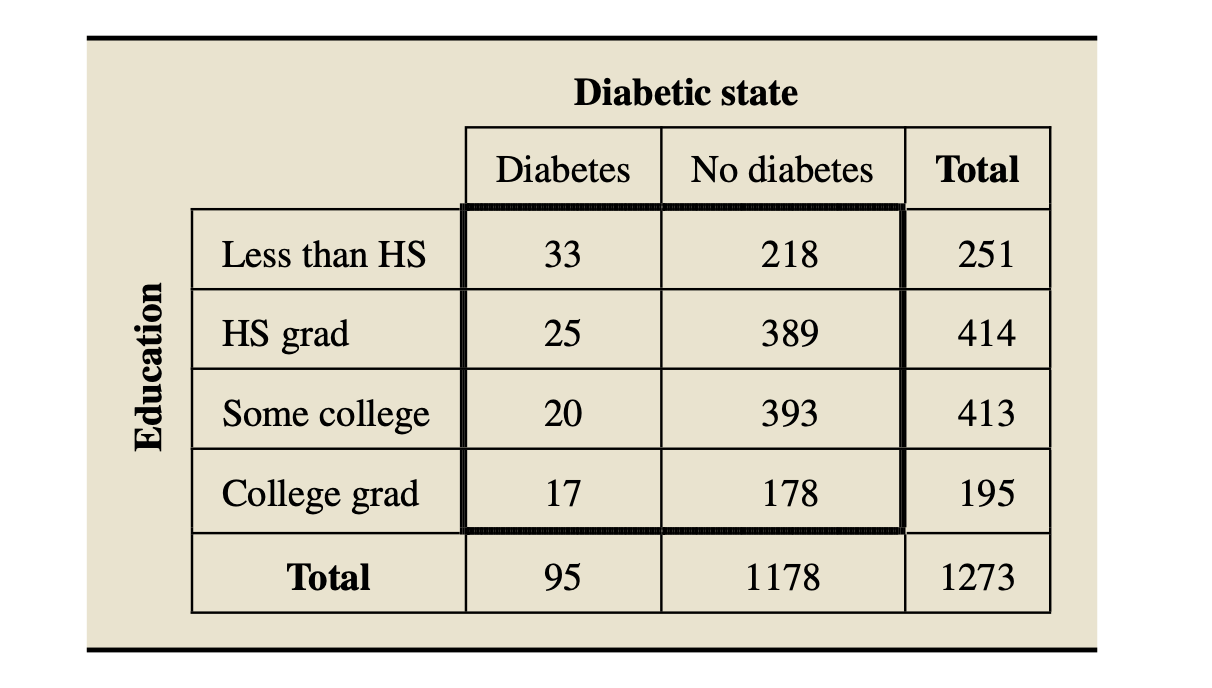

At the 1% significance level, do the data provide sufficient evidence to conclude that an association
exists between educational level and diabetic state for Native Americans?

Choose the correct option below :

* H0 -> Getting Diabates and educational attainment's effect are independent
* Ha -> Getting Diabates and educational attainment's effect are dependent

In [34]:
alpha = 0.01
chi_stat,p_value,df,expected = chi2_contingency(np.array([
    [33,218],
    [25,389],
    [20,393],
    [17,178]])
)

if p_value < alpha:
    print("Reject null hypothesis")
    print("Getting Diabates and educational attainment's effect are dependent")
else:
    print("Failed to reject null H0")
    print("Getting Diabates and educational attainment's effect are independent")
p_value


Reject null hypothesis
Getting Diabates and educational attainment's effect are dependent


0.000554511571355531

## Assignment Question 3


Q3. Religion and Education
Solved
feature icon
Using hints is now penalty free
Use Hint
A worldwide poll on religion was conducted by WIN-Gallup International and published as the document Global Index of
Religiosity and Atheism.

One question involved religious belief and educational attainment.

The following data is based on the answers to that question.

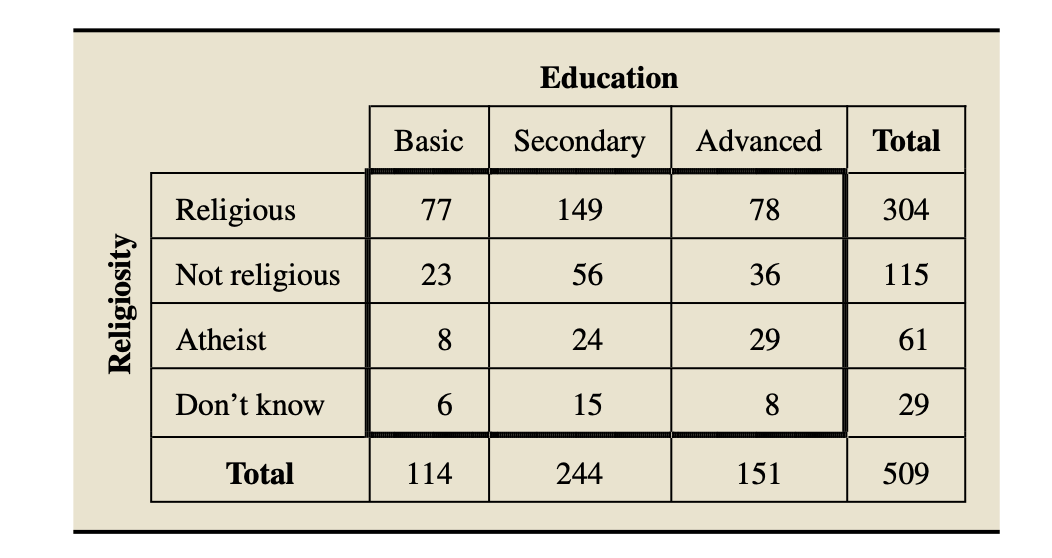

At the 5% significance level, do the data provide sufficient evidence to
conclude that an association exists between religiosity and education?

Choose the correct option below :


* H0 -> Relegious belif and educational attainment's effect are independent
* Ha -> Relegious belif and educational attainment's effect are dependent

In [36]:
alpha = 0.05
chi_stat,p_value,df,expected = chi2_contingency(np.array([
    [77,149,78],
    [23,56,36],
    [8,24,29],
    [6,15,8]])
)

if p_value < alpha:
    print("Reject null hypothesis")
    print("Relegious belif and educational attainment's effect are dependent")
else:
    print("Failed to reject null H0")
    print("GRelegious belif and educational attainment's effect are independent")
p_value


Reject null hypothesis
Relegious belif and educational attainment's effect are dependent


0.038193742691133806

## Assignment Question 4

Nationwide surveys as a public service and for research. This problem is based on the results of one such poll that asked independent random samples of adults in urban, suburban, and rural regions,

"Do you support or oppose requiring background checks for all gun buyers?"

The survey results are in the table below:

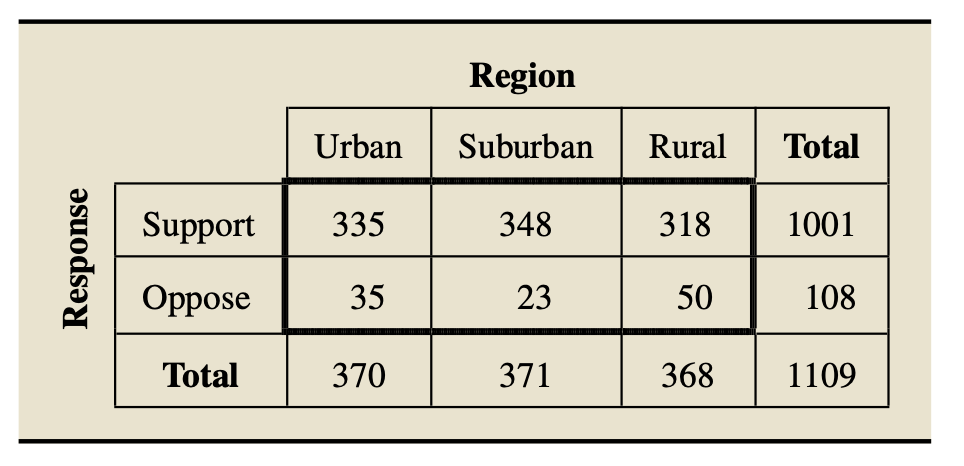

At the 1% significance level, do the data provide sufficient evidence to conclude that there is any association between response and three regions?

Choose the correct option below :

* H0 -> Region and support for gun buyers are associated
* Ha -> Region and support for gun buyers are not associated

In [40]:
alpha = 0.01
chi_stat,p_value,df,expected = chi2_contingency(np.array([
    [335,348,318],
    [35,23,50],
   ])
)

if p_value < alpha:
    print("Reject null hypothesis")
    print("Region and support for gun buyers are associated")
else:
    print("Failed to reject null H0")
    print("Region and support for gun buyers are not associated")
p_value


Reject null hypothesis
Region and support for gun buyers are associated


0.003151828690194211

## Assignment Question 5

A random sample of adults yielded the following data on age and Internet usage.



At the 1% significance level,
does the data provide sufficient evidence to conclude that an association exists between age and Internet usage?


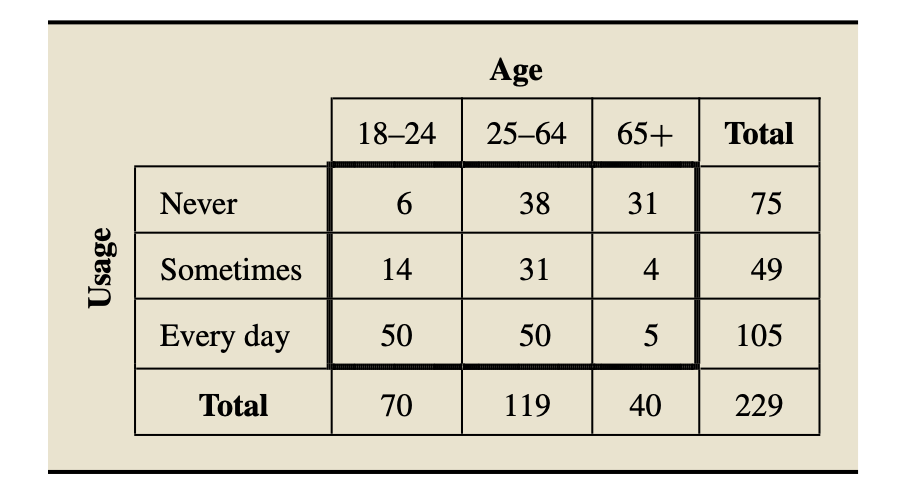
Choose the correct option below :


* H0 -> Age and usage are independednt
* Ha -> Age and usage are dependedent

In [71]:
alpha = 0.01
chi_stat,p_value,df,expected = chi2_contingency(np.array([
    [6,38,31],
    [14,31,4],
    [50,50,5]
   ])
)

if p_value < alpha:
    print("Reject null hypothesis")
    print("Age and usage are dependent")
else:
    print("Failed to reject null H0")
    print("Age and usage are independent")
p_value


Reject null hypothesis
Age and usage are dependent


2.0217185191724964e-12

## Assignment Question 6


The U.S. Census Bureau compiles information on money income of people by type of residence and
publishes its finding in Current Population Reports.

Independent simple random samples of people residing inside principal cities (IPC),
outside principal cities but within metropolitan areas (OPC), and outside metropolitan areas (OMA),
gave the following data on income level.

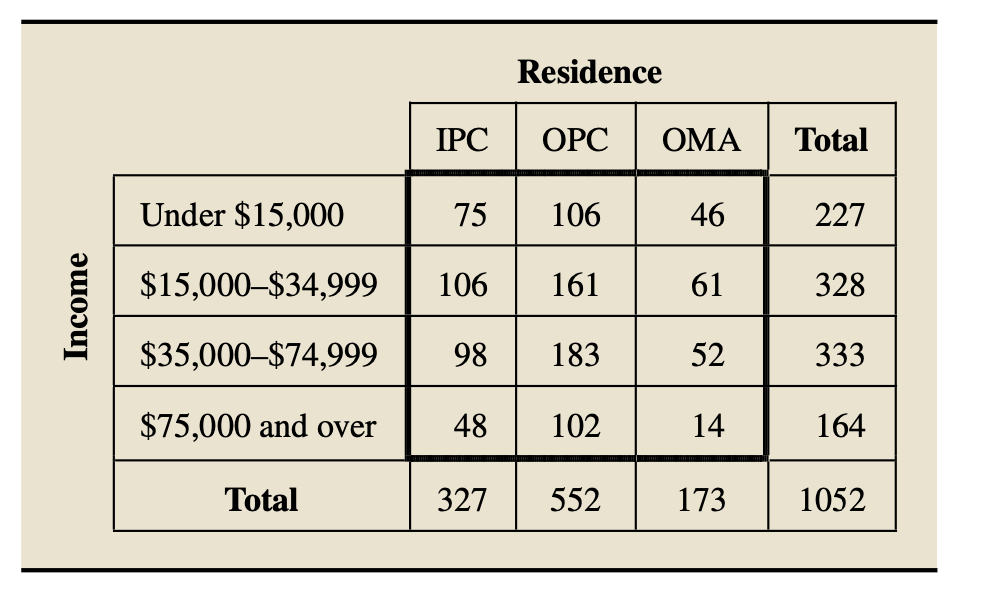

At the 5% significance level,
Does the type of residence is related to income level?

Choose the correct option below :

* H0: Type of residance and income level are related
* Ha:  ype of residance and income level are not related

In [75]:
alpha = 0.05
chi_stat,p_value,df,expected = chi2_contingency(np.array([
    [75,106,46],
    [106,161,61],
    [98,183,52],
    [48,102,14]
   ])
)

if p_value < alpha:
    print("Reject null hypothesis")
    print("Type of residance and income level are related")
else:
    print("Failed to reject null H0")
    print("Type of residance and income level are not related")
p_value


Reject null hypothesis
Type of residance and income level are related


0.015293451318673136